In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [21]:
# Patient file paths
patients = {
    1: ['Data/organized_fcs_data1a.csv', 'Data/organized_fcs_data1b.csv', 'Data/organized_fcs_data1c.csv'],
    2: ['Data/organized_fcs_data2a.csv', 'Data/organized_fcs_data2b.csv', 'Data/organized_fcs_data2c.csv'],
    3: ['Data/organized_fcs_data3a.csv', 'Data/organized_fcs_data3b.csv', 'Data/organized_fcs_data3c.csv'],
    4: ['Data/organized_fcs_data4a.csv', 'Data/organized_fcs_data4b.csv', 'Data/organized_fcs_data4c.csv'],
    5: ['Data/organized_fcs_data5a.csv', 'Data/organized_fcs_data5b.csv', 'Data/organized_fcs_data5c.csv'],
    6: ['Data/organized_fcs_data6a.csv', 'Data/organized_fcs_data6b.csv', 'Data/organized_fcs_data6c.csv'],
    7: ['Data/organized_fcs_data7.csv'],
    8: ['Data/organized_fcs_data8a.csv', 'Data/organized_fcs_data8b.csv', 'Data/organized_fcs_data8c.csv'],
    9: ['Data/organized_fcs_data9a.csv', 'Data/organized_fcs_data9b.csv'],
    10: ['Data/organized_fcs_data10a.csv', 'Data/organized_fcs_data10b.csv', 'Data/organized_fcs_data10c.csv'],
    11: ['Data/organized_fcs_data11.csv'],
    12: ['Data/organized_fcs_data12a.csv', 'Data/organized_fcs_data12b.csv', 'Data/organized_fcs_data12c.csv']
}

In [22]:
def load_patient_data(patient_ids):
    all_data = []
    for pid in patient_ids:
        for file in patients[pid]:
            if os.path.exists(file):
                df = pd.read_csv(file)
                df = df.drop(columns=['Time'])  
                all_data.append(df.astype(np.float32).values)
            else:
                print(f"File not found: {file}")
    if all_data:
        return np.vstack(all_data)
    else:
        return np.empty((0, 14))


In [23]:
# Load healthy and unhealthy data
healthy_cells = load_patient_data([1, 2, 3, 4, 5, 6])
unhealthy_cells = load_patient_data([7, 8, 9, 10, 11, 12])

In [24]:
# Scaling data 
print("Scaling data")
scaler = StandardScaler()
healthy_cells_scaled = scaler.fit_transform(healthy_cells)
unhealthy_cells_scaled = scaler.transform(unhealthy_cells)

Scaling data


In [ ]:
# Fitting GMM to scaled healthy cells
# print("Fitting GMM to healthy data")
# gmm = GaussianMixture(n_components=6, covariance_type='tied', random_state=42)
# gmm.fit(healthy_cells_scaled)

Fitting GMM to healthy data


GaussianMixture(covariance_type='tied', n_components=6, random_state=42)

In [6]:
# Saving model
# joblib.dump(gmm, 'gmm_s_complete_tied_6.pkl')
# print("GMM model saved")

gmm = joblib.load('gmm_s_complete_tied_6.pkl')

In [13]:
# Score both healthy & unhealthy cells
print("Scoring cells")
healthy_scores = gmm.score_samples(healthy_cells_scaled)
unhealthy_scores = gmm.score_samples(unhealthy_cells_scaled)

Scoring cells


In [ ]:
threshold2 = np.percentile(healthy_scores, 1.5) 
print(threshold2)


# -42.360149076395196

-61.75711675388737
-42.360149076395196
-42.360149076395196


In [10]:
# Detecting anomalies in unhealthy cells
anomalies = unhealthy_scores < threshold2
healthy_anomalies = healthy_scores < threshold2

#Each patient MRD percentages:
print("\n MRD percentage for each unhealthy patient:")

unhealthy_patient_ids = [7, 8, 9, 10, 11, 12]
start_idx = 0

for pid in unhealthy_patient_ids:
    patient_data = load_patient_data([pid])
    patient_cells = len(patient_data)
    patient_anomalies = anomalies[start_idx:start_idx + patient_cells]
    patient_mrd_percentage = (np.sum(patient_anomalies) / patient_cells) * 100
    print(f"Patient {pid}: {patient_mrd_percentage:.4f}% MRD")
    start_idx += patient_cells




 MRD percentage for each unhealthy patient:
Patient 7: 4.7529% MRD
Patient 8: 2.2770% MRD
Patient 9: 9.8128% MRD
Patient 10: 3.6966% MRD
Patient 11: 14.9379% MRD
Patient 12: 5.1820% MRD


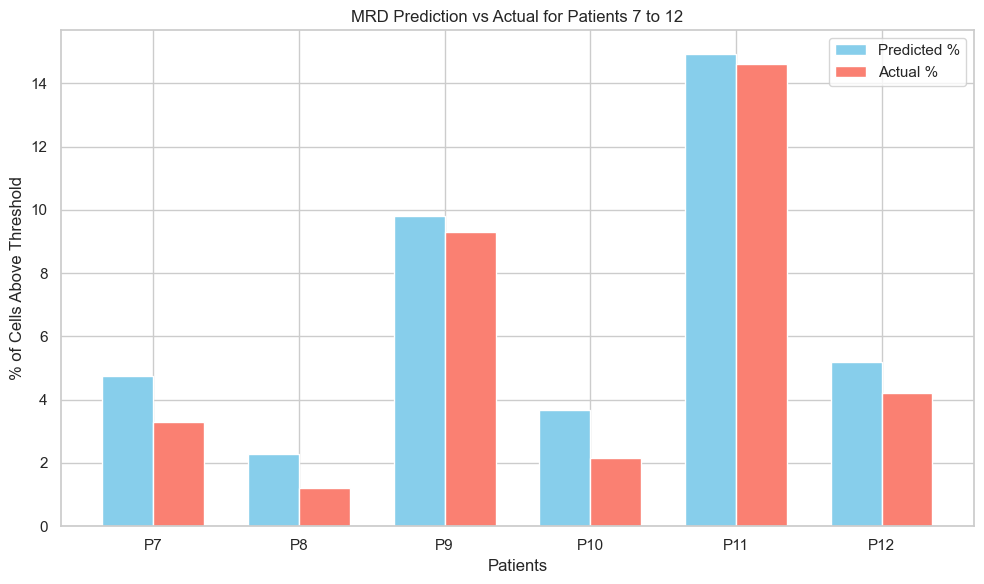

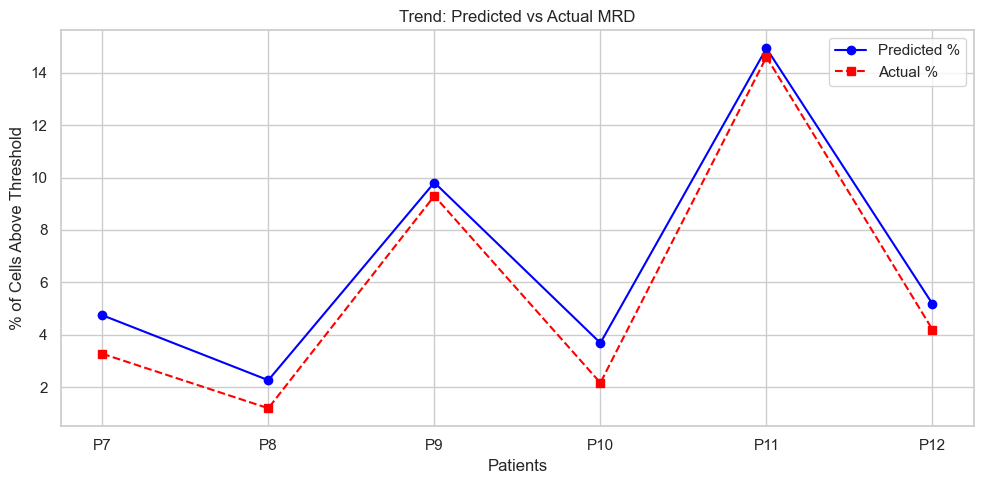

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient IDs
patients = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

# Predicted percentages by model
predicted_percentages = [4.75,2.27,9.81,3.69,14.93,5.18]  
# Actual percentages
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]

# DataFrame for visualization
df_plot = pd.DataFrame({
    'Patient': patients,
    'Predicted': predicted_percentages,
    'Actual': actual_percentages
})

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot bars
bar_width = 0.35
x = np.arange(len(patients))
plt.bar(x - bar_width/2, df_plot['Predicted'], bar_width, label='Predicted %', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Actual'], bar_width, label='Actual %', color='salmon')

# labels and legend
plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('MRD Prediction vs Actual for Patients 7 to 12')
plt.xticks(ticks=x, labels=patients)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(patients, predicted_percentages, marker='o', label='Predicted %', linestyle='-', color='blue')
plt.plot(patients, actual_percentages, marker='s', label='Actual %', linestyle='--', color='red')

plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('Trend: Predicted vs Actual MRD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()